# An Analysis of GoBike Data

## Overview

This is an analysis of GoBike Data to **highlight COVID-19 impact, to gain insights about users & to help the company target offers in certain stations.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data
# this data is generated in the analysis notebook
data = pd.read_csv("./data_clean.csv", low_memory=False)

In [3]:
data.head()

,start_station_name,end_station_name,rental_access_method,rideable_type,start_time,end_time,user_type,duration_min,start_year,start_month,start_day,start_hour,start_weekday
0,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,NaN,NaN,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Subscriber,1347.087517,2019,1,31,17,Thursday
1,Cyril Magnin St at Ellis St,Valencia St at 24th St,NaN,NaN,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,Subscriber,1098.338117,2019,1,31,20,Thursday
2,Downtown Berkeley BART,65th St at Hollis St,NaN,NaN,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,Customer,1043.893433,2019,1,31,18,Thursday
3,Church St at Duboce Ave,Grove St at Divisadero,NaN,NaN,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,Customer,744.676650,2019,1,31,19,Thursday
4,Steuart St at Market St,The Embarcadero at Bryant St,NaN,NaN,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,Customer,1011.825400,2019,1,31,14,Thursday


In [4]:
base_color = sb.color_palette()[0]

### Who does the most rides?

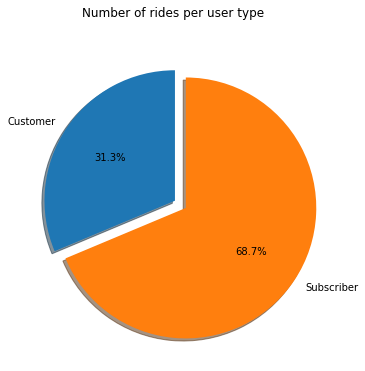

In [5]:
plt.figure(figsize= [15, 6])
proportions = data['user_type'].value_counts()/data.shape[0]
labels = proportions.index
plt.pie(proportions[::-1], labels=labels[::-1], autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90);
plt.title("Number of rides per user type \n");

**Subscribed users do the most rides.**

### Find rush hours

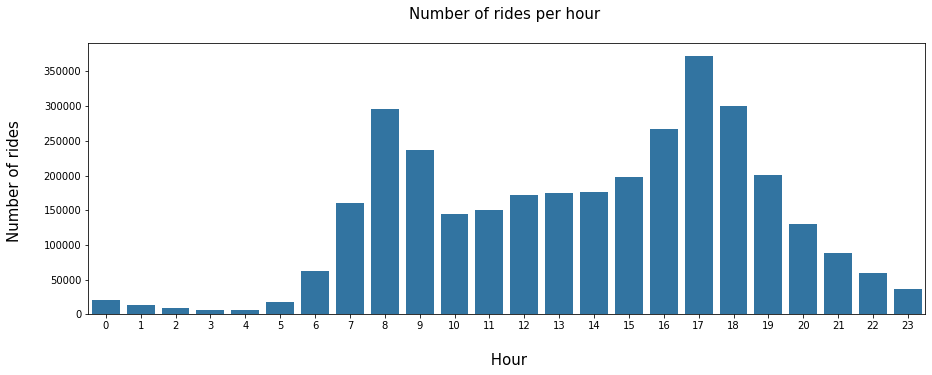

In [6]:
plt.figure(figsize = [15, 5])

sb.countplot(x='start_hour', data=data, color= base_color);

plt.title("Number of rides per hour \n", fontsize=15);
plt.xlabel("\n Hour", fontsize=15);
plt.ylabel("Number of rides \n", fontsize=15);

**Rush hours are (8 AM, 9 AM, 5 PM and 6 PM) which are starting/leaving work hours.**

### Most crowded stations at rush hours:

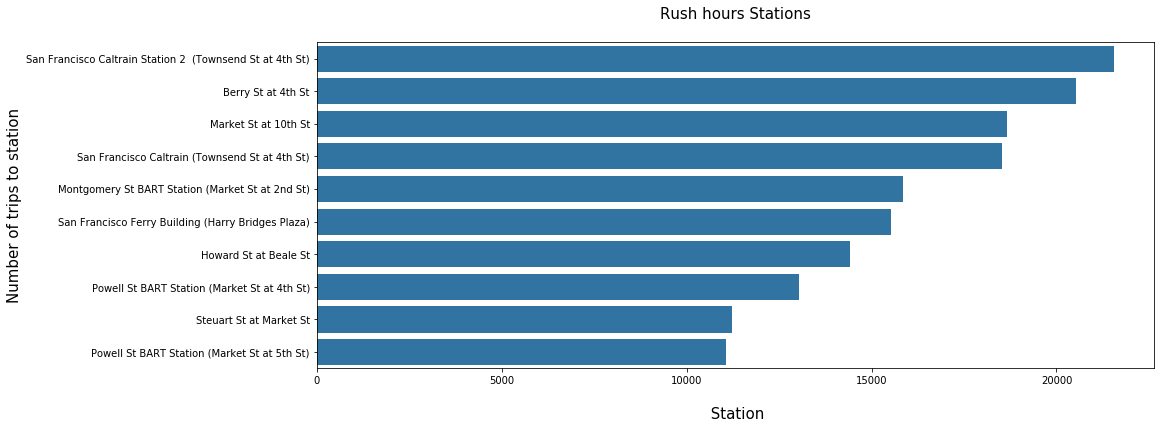

In [7]:
rush_hours_stations = data[data['start_hour'].isin([8,9,17,18])]['start_station_name'].value_counts()[:10]

plt.figure(figsize=(15,6))

sb.barplot(x= rush_hours_stations.values, y= rush_hours_stations.index, color= base_color);

plt.title("Rush hours Stations\n", fontsize=15);
plt.xlabel("\n Station", fontsize=15);
plt.ylabel("Number of trips to station", fontsize=15);

**We can attract users by providing offers to and from these stations.**

### Did COVID-19 affect the business?

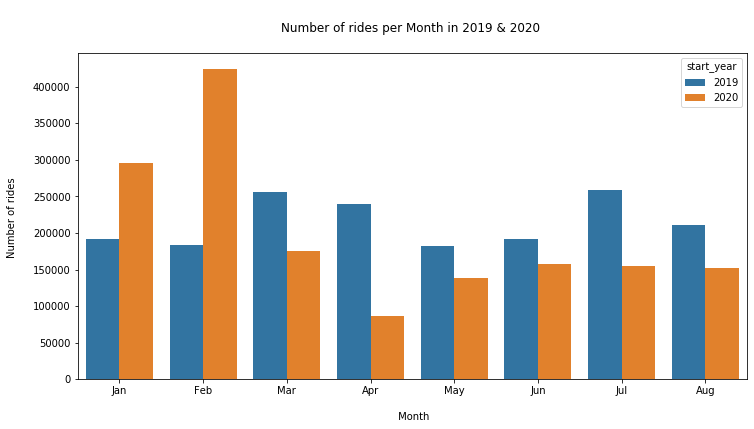

In [8]:
plt.figure(figsize = [12, 6])

sb.countplot(x='start_month', data=data, hue='start_year');
plt.xlabel("\n Month");
plt.ylabel("Number of rides \n");
plt.title("\nNumber of rides per Month in 2019 & 2020 \n");
plt.xticks(ticks=plt.xticks()[0], labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"));

**In 2020, the number of rides was the lowest in March and April, the two months that had the most lockdowns. The number of rides increased a bit at May, but comparing to 2019's numbers, COVID-19 affected the bike rides.**

### The relationship between start_weekday, trip_duration and user_type

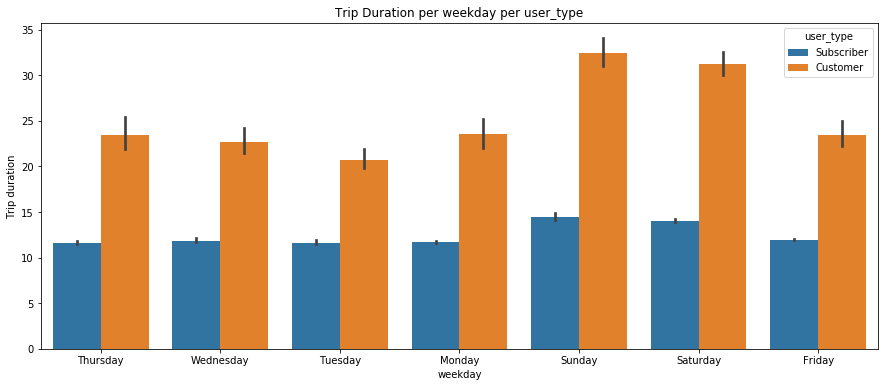

In [9]:
plt.figure(figsize= [15, 6])

sb.barplot(x='start_weekday', y='duration_min', data=data, hue='user_type');
plt.xlabel("weekday");
plt.ylabel("Trip duration");
plt.title("Trip Duration per weekday per user_type");

**The weekend (Saturday and Sunday) has the most trips, we can provide offers at these days.**

**Customers have more trip durations than subscribers, we can offer them subscription plans or bundles.**

## Conclusion:

- COVID-19 affected the bike rides.
- Rush hours are (8 AM, 9 AM, 5 PM and 6 PM) which are starting/leaving work hours.
- Providing offers to and from crowded stations and at rush hours can attract users.
- Customers have more trip durations than subscribers, we can offer them subscription plans or bundles.

## To generate slides run:

jupyter nbconvert GoBike_slide_deck.ipynb --to slides --template output-toggle.tpl